In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
# Read the two data files
athletes = pd.read_csv('data/athlete_events.csv')
regions = pd.read_csv('data/noc_regions.csv')

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = pd.merge(athletes, regions, on='NOC', how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [9]:
athletes = []
regions = []

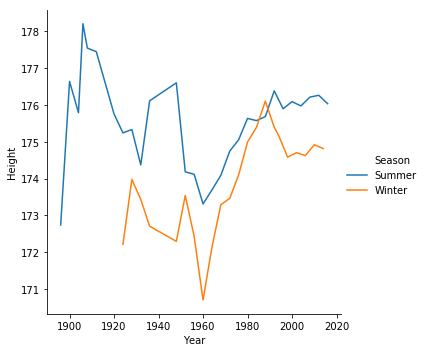

In [10]:
g = sns.relplot(x="Year", y="Height", kind="line", ci=None, hue='Season', data=df)

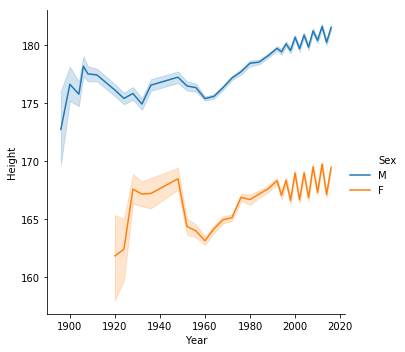

In [11]:
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=df)

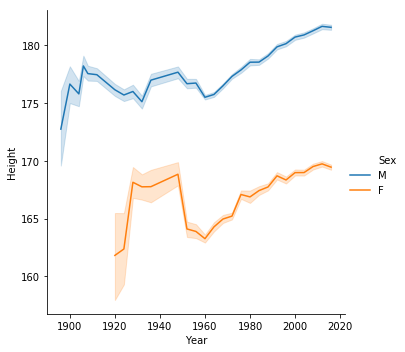

In [12]:
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=summer_df)

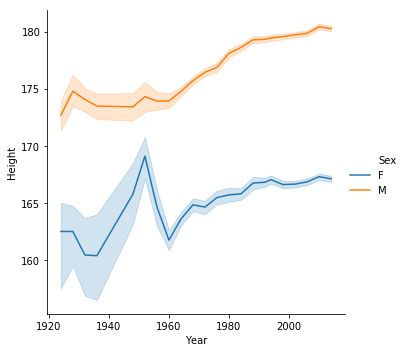

In [13]:
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=winter_df)

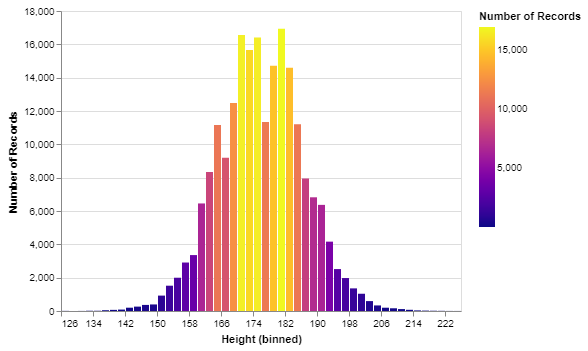

In [14]:
alt.Chart(df).mark_bar().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q'),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
)

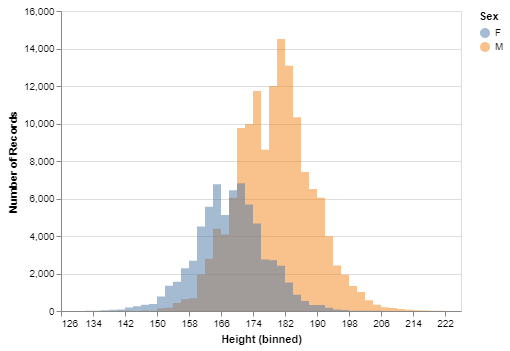

In [15]:
alt.Chart(df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 16000])),
    alt.Color('Sex:N')
)

In [16]:
alt.Chart(df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 16000])),
    alt.Color('Season:N')
)

In [ ]:
g = sns.relplot(x="Year", y="Weight", kind="line", hue='Season', data=df)

In [ ]:
g = sns.relplot(x="Year", y="Age", kind="line", hue='Season', data=df)

In [ ]:
alt.Chart(df).mark_rect().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('Weight:Q', bin=alt.Bin(maxbins=60)),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
)

In [ ]:
alt.Chart(summer_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

In [ ]:
alt.Chart(winter_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

In [ ]:
alt.Chart(summer_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

In [ ]:
alt.Chart(winter_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

In [ ]:
alt.Chart(summer_df).mark_line().encode(
    x='Year:O',
    y='count(Sex):Q',
)

In [ ]:
india_summer_df = summer_df[summer_df['NOC']=='IND']
india_summer_df.shape

In [ ]:
india_winter_df = winter_df[winter_df['NOC']=='IND']
india_winter_df.shape

In [ ]:
alt.Chart(india_winter_df).mark_point().encode(
    alt.Y('Name'),
    alt.X('Year:O'),
    color='Medal:N'
)

In [ ]:
india_summer_medal = india_summer_df[india_summer_df['Medal'].notnull()]

In [ ]:
alt.Chart(india_summer_medal).mark_point().encode(
    alt.Y('count()'),
    alt.X('Year:O'),
    color='Medal:N'
)

In [ ]:
alt.Chart(india_summer_medal).mark_rect().encode(
    alt.Y('Sport:N'),
    alt.X('Year:O'),
    color='Medal:N'
)

In [ ]:
alt.Chart(india_summer_df).mark_line().encode(
    x='Year:O',
    y='count(Sex):Q',
    color='Sex:N'
)

In [ ]:
summer_medal = summer_df[summer_df['Medal'].notnull()]

In [ ]:
basketball_medal = summer_medal[summer_medal['Sport'] == 'Basketball']

In [ ]:
alt.Chart(basketball_medal).mark_rect().encode(
    alt.Y('region:N'),
    alt.X('Year:O'),
    color=('Medal:N')
)